### data7数据

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import MinMaxScaler

In [33]:
dataset = pd.read_csv('data/data7.csv',engine='python')

In [34]:
dataset

,硫酸系统1#变,data
0,18439896,NaN
1,18439920,24.0
2,18439968,48.0
3,18440016,48.0
4,18440040,24.0
...,...,...
145,18445320,48.0
146,18445344,24.0
147,18445392,48.0
148,18445440,48.0


In [35]:
dataset = dataset.fillna(0)
dataset

,硫酸系统1#变,data
0,18439896,0.0
1,18439920,24.0
2,18439968,48.0
3,18440016,48.0
4,18440040,24.0
...,...,...
145,18445320,48.0
146,18445344,24.0
147,18445392,48.0
148,18445440,48.0


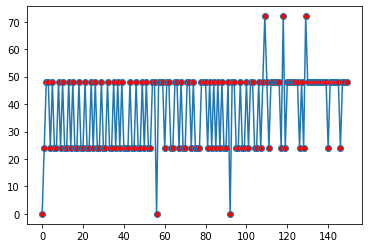

In [36]:
plt.plot(list(range(0,150)),dataset["data"],marker='o',markerfacecolor="r")

In [37]:
#set variable
rs = np.random.RandomState(169)
lendata = dataset.shape[0]
outliers_fraction = 0.03
test_data = []
anomaly = []

In [38]:
def normalize(dataset,a,b):
    scaler = MinMaxScaler(feature_range=(a, b))
    normalize_data = scaler.fit_transform(dataset)
    return normalize_data

In [39]:
#read dataset x,y
x = normalize(pd.DataFrame(dataset, columns=["data"]),-1,1)

In [40]:
ifm = IsolationForest(n_estimators=100,verbose=2,n_jobs=2,max_samples=lendata,random_state=rs,max_features=1)

In [41]:
ifm.fit(x)

Building estimator 1 of 50 for this parallel run (total 100)...Building estimator 1 of 50 for this parallel run (total 100)...

Building estimator 2 of 50 for this parallel run (total 100)...
Building estimator 2 of 50 for this parallel run (total 100)...
Building estimator 3 of 50 for this parallel run (total 100)...
Building estimator 4 of 50 for this parallel run (total 100)...Building estimator 3 of 50 for this parallel run (total 100)...

Building estimator 4 of 50 for this parallel run (total 100)...Building estimator 5 of 50 for this parallel run (total 100)...

Building estimator 5 of 50 for this parallel run (total 100)...Building estimator 6 of 50 for this parallel run (total 100)...

Building estimator 7 of 50 for this parallel run (total 100)...
Building estimator 6 of 50 for this parallel run (total 100)...
Building estimator 8 of 50 for this parallel run (total 100)...Building estimator 7 of 50 for this parallel run (total 100)...

Building estimator 8 of 50 for this para

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.2s finished


IsolationForest(max_features=1, max_samples=150, n_jobs=2,
                random_state=RandomState(MT19937) at 0x7F8DB6CA5140, verbose=2)

In [42]:
scores_pred = ifm.decision_function(x)

In [43]:
scores_pred

array([-0.29436994,  0.02847819,  0.04445714,  0.04445714,  0.02847819,
        0.04445714,  0.02847819,  0.02847819,  0.04445714,  0.02847819,
        0.04445714,  0.02847819,  0.02847819,  0.04445714,  0.02847819,
        0.04445714,  0.02847819,  0.02847819,  0.04445714,  0.02847819,
        0.02847819,  0.04445714,  0.02847819,  0.02847819,  0.04445714,
        0.02847819,  0.04445714,  0.02847819,  0.02847819,  0.04445714,
        0.02847819,  0.02847819,  0.04445714,  0.02847819,  0.02847819,
        0.04445714,  0.02847819,  0.04445714,  0.02847819,  0.04445714,
        0.02847819,  0.02847819,  0.02847819,  0.04445714,  0.02847819,
        0.02847819,  0.04445714,  0.02847819,  0.02847819,  0.04445714,
        0.02847819,  0.04445714,  0.02847819,  0.02847819,  0.04445714,
        0.04445714, -0.29436994,  0.04445714,  0.04445714,  0.04445714,
        0.02847819,  0.04445714,  0.04445714,  0.02847819,  0.02847819,
        0.04445714,  0.04445714,  0.02847819,  0.04445714,  0.02

In [44]:
threshold = stats.scoreatpercentile(scores_pred, 100 * outliers_fraction)

In [45]:
threshold

-0.2943699400650026

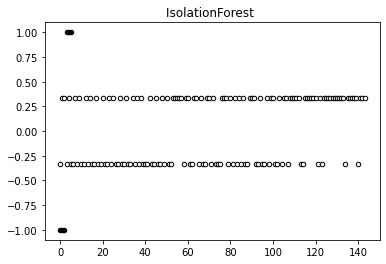

In [46]:
plt.title("IsolationForest ")
for i in scores_pred:
    if i <= threshold:
        #print(i)
        test_data.append(1)
        anomaly.append(i)
    else:
        test_data.append(0)
        
ano_lable = np.column_stack(((dataset['硫酸系统1#变'],dataset['data'],x,scores_pred, test_data)))
df = pd.DataFrame(data=ano_lable, columns=['硫酸系统1#变','data','x', 'IsoFst_Score','label'])

b = plt.scatter(list(range(0,144)),df['x'][df['label'] == 0], s=20, edgecolor='k',c='white')
c = plt.scatter(list(range(0,6)),df['x'][df['label'] == 1], s=20, edgecolor='k',c='black')

In [47]:
ano_lable = np.column_stack(((df['硫酸系统1#变'],df['data'],x,scores_pred, test_data)))

In [48]:
ano_lable

array([[ 1.84398960e+07,  0.00000000e+00, -1.00000000e+00,
        -2.94369940e-01,  1.00000000e+00],
       [ 1.84399200e+07,  2.40000000e+01, -3.33333333e-01,
         2.84781882e-02,  0.00000000e+00],
       [ 1.84399680e+07,  4.80000000e+01,  3.33333333e-01,
         4.44571419e-02,  0.00000000e+00],
       [ 1.84400160e+07,  4.80000000e+01,  3.33333333e-01,
         4.44571419e-02,  0.00000000e+00],
       [ 1.84400400e+07,  2.40000000e+01, -3.33333333e-01,
         2.84781882e-02,  0.00000000e+00],
       [ 1.84400880e+07,  4.80000000e+01,  3.33333333e-01,
         4.44571419e-02,  0.00000000e+00],
       [ 1.84401120e+07,  2.40000000e+01, -3.33333333e-01,
         2.84781882e-02,  0.00000000e+00],
       [ 1.84401360e+07,  2.40000000e+01, -3.33333333e-01,
         2.84781882e-02,  0.00000000e+00],
       [ 1.84401840e+07,  4.80000000e+01,  3.33333333e-01,
         4.44571419e-02,  0.00000000e+00],
       [ 1.84402080e+07,  2.40000000e+01, -3.33333333e-01,
         2.84781882e-02

In [49]:
df = pd.DataFrame(data=ano_lable, columns=['硫酸系统1#变','data','x', 'IsoFst_Score','label'])

In [50]:
df

,硫酸系统1#变,data,x,IsoFst_Score,label
0,18439896.0,0.0,-1.000000,-0.294370,1.0
1,18439920.0,24.0,-0.333333,0.028478,0.0
2,18439968.0,48.0,0.333333,0.044457,0.0
3,18440016.0,48.0,0.333333,0.044457,0.0
4,18440040.0,24.0,-0.333333,0.028478,0.0
...,...,...,...,...,...
145,18445320.0,48.0,0.333333,0.044457,0.0
146,18445344.0,24.0,-0.333333,0.028478,0.0
147,18445392.0,48.0,0.333333,0.044457,0.0
148,18445440.0,48.0,0.333333,0.044457,0.0


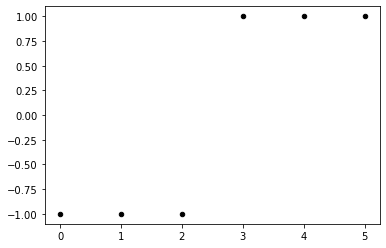

In [51]:
c = plt.scatter(list(range(0,6)),df['x'][df['label'] == 1], s=20, edgecolor='k',c='black')

In [52]:
print("孤立森林阈值  ：",threshold)
print("全量数据样本数：",len(dataset),"个")
print("检测异常样本数：",len(anomaly),"个")

孤立森林阈值  ： -0.2943699400650026
全量数据样本数： 150 个
检测异常样本数： 6 个
